In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(25022205)

In [3]:
rank = pd.Series(['ace',2,3,4,5,6,7,8,9,10,'jack','queen','king'])

In [4]:
suit = pd.Series(['heart','spades','club','diamonds'])

In [5]:
deck = pd.merge(rank.rename('rank').to_frame(),suit.rename('suit').to_frame(),how='cross')
#deck = pd.merge(rank.to_frame(),suit.to_frame(),how='cross')
#default
deck

,rank,suit
0,ace,heart
1,ace,spades
2,ace,club
3,ace,diamonds
4,2,heart
5,2,spades
6,2,club
7,2,diamonds
8,3,heart
9,3,spades


In [6]:
def get_new_deck():
    rank = pd.Series(['ace',2,3,4,5,6,7,8,9,10,'jack','queen','king'])
    suit = pd.Series(['heart','spades','club','diamonds'])
    deck = pd.merge(rank.rename('rank').to_frame(),suit.rename('suit').to_frame(),how='cross')
#deck = pd.merge(rank.to_frame(),suit.to_frame(),how='cross')
#default
    return deck # if not return, the value will go away

In [7]:
deck = get_new_deck()
hand = deck.sample(5,replace=False)
hand

,rank,suit
6,2,club
40,jack,heart
38,10,club
4,2,heart
36,10,heart


In [8]:
deck.set_index(['rank','suit'])

Empty DataFrame
Columns: []
Index: [(ace, heart), (ace, spades), (ace, club), (ace, diamonds), (2, heart), (2, spades), (2, club), (2, diamonds), (3, heart), (3, spades), (3, club), (3, diamonds), (4, heart), (4, spades), (4, club), (4, diamonds), (5, heart), (5, spades), (5, club), (5, diamonds), (6, heart), (6, spades), (6, club), (6, diamonds), (7, heart), (7, spades), (7, club), (7, diamonds), (8, heart), (8, spades), (8, club), (8, diamonds), (9, heart), (9, spades), (9, club), (9, diamonds), (10, heart), (10, spades), (10, club), (10, diamonds), (jack, heart), (jack, spades), (jack, club), (jack, diamonds), (queen, heart), (queen, spades), (queen, club), (queen, diamonds), (king, heart), (king, spades), (king, club), (king, diamonds)]

In [9]:
def score_hand(hand):
    score=0
    aces = hand.loc[hand['rank']=='ace']
    rest = hand.loc[hand['rank'] != 'ace']

    for _i, card in rest.iterrows():
        if type(card['rank']) == int:
            score += card['rank']
        elif type(card['rank']) == str:
            score += 10
    for _i, card in aces.iterrows():
        if score + 11 > 21:
            score += 1
        else:
            score += 11
    
    return score

In [10]:
hand

,rank,suit
6,2,club
40,jack,heart
38,10,club
4,2,heart
36,10,heart


In [11]:
score_hand(hand)

34

In [17]:
score = 0
while True:
    score += 3
    if score >50:
        break
    #
    #foo(bar)

In [18]:
score

51

In [21]:
deck = get_new_deck()
while len(deck) > hand_size:
    hand, deck = draw_cards(hand_size, deck)
    if 'ace' in hand['rank']:
        continue
    running_score += score_hand(hand)

NameError: name 'running_score' is not defined

In [12]:
def draw_cards(n,deck):
    drawn = deck.sample(n,replace=False)
    deck = deck.drop(drawn.index)
    return drawn, deck

In [13]:
tup_a = (1,2,3)
a, b, c = tup_a
print(a,b,c)

1 2 3


In [38]:
hand_size = 5
deck = get_new_deck()
while len(deck) > hand_size:
    hand, deck = draw_cards(hand_size, deck)
    print(len(deck))

47
42
37
32
27
22
17
12
7
2


In [15]:
deck

,rank,suit
10,3,club
27,7,diamonds


In [32]:
import matplotlib.pyplot as plt

(array([ 33.,  97., 131.,  71., 298., 380., 166., 299., 244., 281.]),
 array([ 4. ,  5.7,  7.4,  9.1, 10.8, 12.5, 14.2, 15.9, 17.6, 19.3, 21. ]),
 <BarContainer object of 10 artists>)

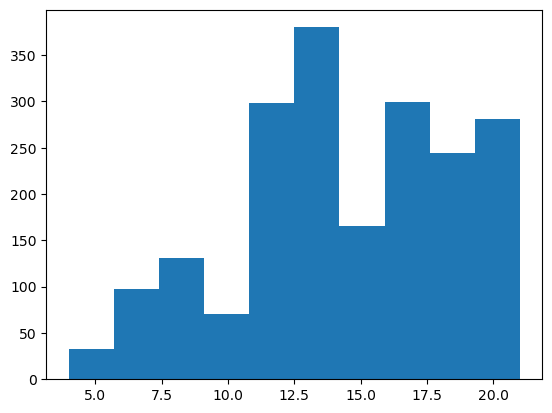

In [60]:
num_trials = 2000

trial_results = []

for i in range(num_trials):
    deck = get_new_deck()
    score = play_hand(deck)
    trial_results.append(score)

plt.hist(trial_results)

In [56]:
trial_results


[21,
 9,
 13,
 16,
 5,
 20,
 21,
 7,
 18,
 16,
 8,
 13,
 16,
 20,
 13,
 12,
 20,
 9,
 12,
 11,
 17,
 14,
 11,
 8,
 13,
 14,
 21,
 7,
 15,
 12,
 18,
 21,
 19,
 20,
 12,
 13,
 12,
 16,
 10,
 13,
 13,
 15,
 19,
 13,
 16,
 16,
 20,
 17,
 19,
 21]

In [ ]:
def play_hand(deck):
    hand, deck = draw_cards(2, deck)

    running_score = score_hand(hand)

    _condition = False # start at False condition
    if running_score >= 17: # 17 is the Black Jack safe score
        _condition = False
    
    if running_score <= 10:
        _condition = False
    
    while _condition:
        draw_card, deck = draw_cards(1,deck)
        hand = pd.concat([hand, drawn_card])

        running_score = score_hand(hand)

        if running_score >=17:
            _condition = False
    
    score = score_hand(hand)
    if score > 21:
        score = 0
        
    return(score)


In [26]:
score


51